# Testing for the loss:

In [15]:
import numpy as np
from sklearn.cross_decomposition import CCA
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
from linear_cca import linear_cca
from torch.utils.data import BatchSampler, SequentialSampler
from DeepCCAModels import DeepCCA
from main import Solver
from utils import load_data, svm_classify
from objectives import cca_loss
try:
    import cPickle as thepickle
except ImportError:
    import _pickle as thepickle
import pickle
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import sklearn.model_selection as model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pprint

In [98]:
U = np.random.random_sample(10000).reshape(250,40)
V = np.random.random_sample(10000).reshape(250,40)

In [104]:
# Get the first n components:
n_comps = 20
cca = CCA(n_components=n_comps)
U_c_1, V_c_1 = cca.fit_transform(U, V) # Fits and transforms
print(U_c_1.shape, V_c_1.shape)
result1 = np.corrcoef(U_c_1.T, V_c_1.T).diagonal(offset=n_comps) # find how similar the respective components are

l_cca = linear_cca()
l_cca.fit(U,V,n_comps) # Fits, saves the transformation materices (= the weights the matrices should be multiplied with) to obj
U_c_2, V_c_2 = np.matmul(U, l_cca.w[0]), np.matmul(V, l_cca.w[1]) # get the transformed matrices by multiplying
print(U_c_2.shape, V_c_2.shape)
result2 = np.corrcoef(U_c_2.T, V_c_2.T).diagonal(offset=n_comps) # find how similar the respective components are


(250, 20) (250, 20)
(250, 20) (250, 20)


In [105]:
print("result1 shape:",result1.shape)
print("result2 shape:",result2.shape)
print("result1:", result1)
print("result2:", result2)
print("SKL cca score:",cca.score(U, V))

result1 shape: (20,)
result2 shape: (20,)
result1: [0.69367787 0.70100441 0.6654229  0.63941787 0.62874624 0.59500629
 0.56979911 0.5544822  0.53399826 0.51698067 0.50523168 0.49150493
 0.4765976  0.45756992 0.4448299  0.42383999 0.4077086  0.37960424
 0.36477746 0.34745765]
result2: [0.70101221 0.69367444 0.66541999 0.63942557 0.62873784 0.59500775
 0.56979952 0.55448128 0.5339971  0.51698441 0.50522909 0.49150404
 0.47659657 0.45757271 0.44482719 0.42384009 0.40770785 0.37960474
 0.36477702 0.34745723]
SKL cca score: 0.0224917383819401


In [106]:
c_loss = cca_loss(10, True, torch.device('cpu'))
correlation = c_loss.loss(torch.from_numpy(U),torch.from_numpy(V))
print(correlation)

tensor(-15.7004)


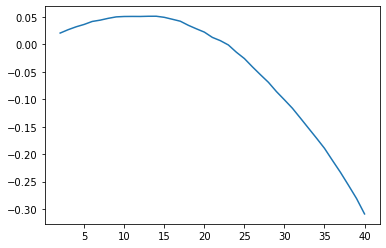

In [107]:
skl = []
l = []
obj = []
for n_comps in list(range(2,41)):
    cca = CCA(n_components=n_comps)
    cca.fit(U, V)
    skl.append(cca.score(U,V))

plt.plot(list(range(2,41)), skl)
plt.show()

    

